## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# To display image
from PIL import Image

# To read dataset images
import cv2
import os

## Import and Inspect the Data


In [2]:
# Check the number of training images
num_images_train_normal = len(os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL"))
num_images_train_pneumonia = len(os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"))

num_images_train_normal, num_images_train_pneumonia

(1341, 3875)

In [3]:
# Getting the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("../input/chest-xray-pneumonia/chest_xray/train/") # Turns training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Creates a list of class_names from the subdirectories
print(class_names)

['NORMAL' 'PNEUMONIA']


**So we've got 1341 images of normal x-rays and 3875 images of pneumonia infected x-rays**

In [4]:
# Function to view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (1395, 1724)


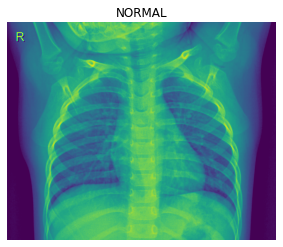

In [5]:
# View a random image from the training dataset (Normal)
img = view_random_image(target_dir="../input/chest-xray-pneumonia/chest_xray/train/",
                        target_class="NORMAL")

Image shape: (1072, 1456)


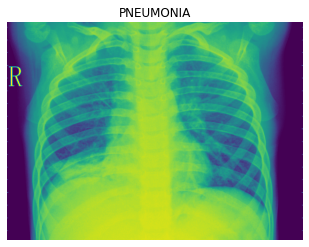

In [6]:
# View a random image from the training dataset (Pneumonia)
img = view_random_image(target_dir="../input/chest-xray-pneumonia/chest_xray/train/",
                        target_class="PNEUMONIA")

In [7]:
# View the image as an array of pixel values
img

array([[3, 3, 4, ..., 0, 0, 0],
       [3, 3, 4, ..., 0, 0, 0],
       [3, 3, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
# Normalize the pixel values for img
img/255

array([[0.01176471, 0.01176471, 0.01568627, ..., 0.        , 0.        ,
        0.        ],
       [0.01176471, 0.01176471, 0.01568627, ..., 0.        , 0.        ,
        0.        ],
       [0.01176471, 0.01176471, 0.01568627, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Preprocessing the data

In [9]:
# Define training,test and validation directory paths
train_dir = "../input/chest-xray-pneumonia/chest_xray/train/"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test/"

In [10]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from numpy import expand_dims

In [11]:
# Normalize the pixel values
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator (rescale=1./255) 

In [12]:
train_set = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size= 32, class_mode='binary')
test_set = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size= 32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
# checking image shape
train_set.image_shape, test_set.image_shape

((224, 224, 3), (224, 224, 3))

In [14]:
# Check lengths of training and test data generators
len(train_set), len(test_set)

(163, 20)

## Build the Model

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(256, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(512, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [16]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.0001),
               metrics="accuracy")


In [17]:
# Fit the model
history_1 = model_1.fit(train_set,
                       epochs=5,
                       steps_per_epoch=len(train_set),
                       validation_data=test_set,
                       validation_steps=len(test_set))

Epoch 1/5
163/163 [==============================] - 61s 363ms/step - loss: 0.4406 - accuracy: 0.7913 - val_loss: 0.7592 - val_accuracy: 0.7580
Epoch 2/5
163/163 [==============================] - 59s 361ms/step - loss: 0.1111 - accuracy: 0.9566 - val_loss: 0.7792 - val_accuracy: 0.7516
Epoch 3/5
163/163 [==============================] - 59s 359ms/step - loss: 0.0839 - accuracy: 0.9692 - val_loss: 0.9456 - val_accuracy: 0.7756
Epoch 4/5
163/163 [==============================] - 58s 358ms/step - loss: 0.0730 - accuracy: 0.9716 - val_loss: 0.8536 - val_accuracy: 0.8029
Epoch 5/5
163/163 [==============================] - 58s 356ms/step - loss: 0.0641 - accuracy: 0.9763 - val_loss: 0.8085 - val_accuracy: 0.8093


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 512)       1

## Evaluate the Model

Text(0.5, 1.0, 'Model_1 loss curve')

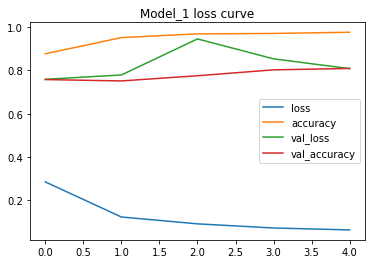

In [19]:
# Plot the loss curves
pd.DataFrame(history_1.history).plot()
plt.title("Model_1 loss curve")

Since the validation loss increased, the model might be overfitting 

In [20]:
# Evaluate the model
model_1.evaluate(test_set)

20/20 [==============================] - 5s 253ms/step - loss: 0.8085 - accuracy: 0.8093


[0.8084696531295776, 0.8092948794364929]